## Observations and Insights

### Summary of study results:
    
* From bar chart we can observe that, the number of data points for each Drug Regimen were all above 150 and both Capomulin and Ramicane Drug Regimen had the most data points out of all the drugs present in the study.

* From the Pie chart, the study had a near identical number of male and female mice. It will be interesting to study if sex of the mouse was correlated to efficacy of the drugs.
    
* Box-Whisker-Plot shows that there are outliers in the data under study, while other measures do not.From box plots, as well as based on the average final tumor volume we can observe that both Capomulin and Ramicane drugs were also the most successful and effective drugs in reducing the size of the tumors within the mice subjects, however to be sure we would need the starting tumor volumes were same. Out of the four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point - and the rest drugs were "well behaved" with the datasets not having any outliers.
    
* From line graph, the Drug regimen of Capomulin was effective in reducing the average tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely removed and survival rate.

* With a correlation of 0.84, there is a strong positive correlation between average tumor volume and weight of the subject mice. Hence size of the tumor is significantly associated with the weight of the mice, this means as the mice weight increases, the average tumor volume will also increase i.e tumor will grow.Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy of the drug.

* Since the correlation of 0.84 is observed between the average tumor volume and weight of the subject mice, then a linear regression model is attempting to explain that weight of the mice in terms of the tumor size will account for 70.9% of the variability in the data. The 70.9% of data points are somewhat closer to the fitted regression line. However, as we saw, R-squared doesn’t tell us the entire story, we should perform some hypothetical testing such as F-test to determine whether the  relationship between mice weight and tumor growth is statistically significant.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
#mouse_metadata
study_results = pd.read_csv(study_results)
#study_results


In [2]:
# Combine the data into a single dataset
mouse_study_combine = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_study_combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
#Combine the two dataframes into one and view the info to see if we need to clean the data
mouse_study_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


 mouse_study_combine.info() shows that all the columns have the same number of values and they are of the right types


## Summary statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM (Std error of mean) of the tumor volume for each regimen

mean = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mouse_study_combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = round(pd.DataFrame({
                                "Mean": mean, 
                               "Median": median, 
                               "Variance": variance, 
                               "Standard Deviation": std_dev, 
                               "SEM": sem}), 3)

# Display summary statistics if tumor volume based on each regimen
# summary_df = summary_df.reset_index()
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


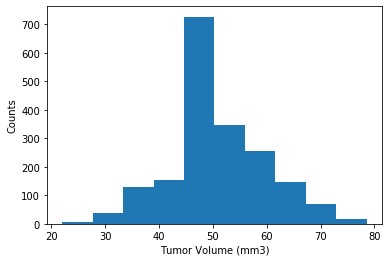

NormaltestResult(statistic=1.4143346727431805, pvalue=0.4930388344333999)


In [8]:
# Plotting the data of the combined data as a histogram and test it to see if it is normally distributed
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(mouse_study_combine['Tumor Volume (mm3)'].sample(100)))

## Bar plots

### Generate a bar plot showing number of data points for each treatment regimen using pandas
### Pandas .plot Bar Chart ###



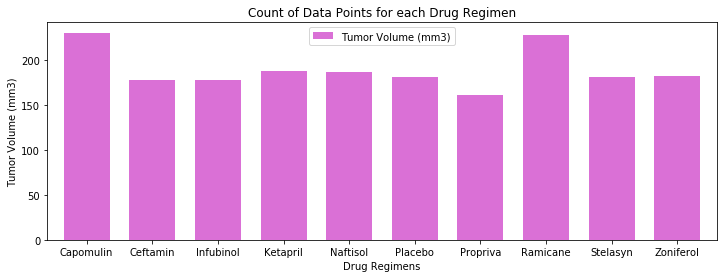

<Figure size 432x288 with 0 Axes>

In [9]:
### BAR Chart using PANDAS

# First create a dataframe grouping by the 'Drug Regimen' column
# Create a dataframe counting the number of data points for each Drug Regimen

summary_regimen = mouse_study_combine.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
regimen_datapoints = pd.DataFrame(summary_regimen)
regimen_datapoints

# Use DataFrame.plot() in order to create a bar chart of the data
ax = regimen_datapoints.plot(kind="bar", title = "Count of Data Points for each Drug Regimen", width=0.7, 
                         color = "orchid", figsize=(12,4), rot=0)

# Set Display for Bar Graph
# Adding Chart Elements

ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()
plt.tight_layout()
plt.savefig('Images/BarChartPandas.png')

### Generate a bar plot showing number of data points for each treatment regimen using pandas
### Matplotlib pyplot Bar Chart ###

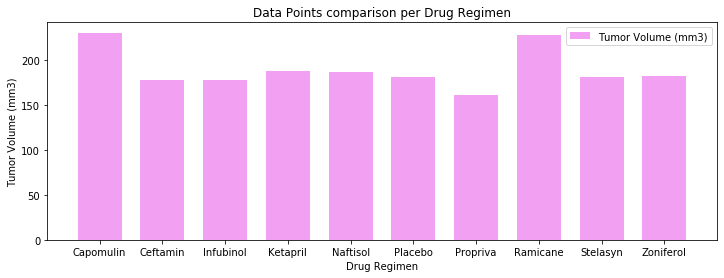

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
### PYPLOT BAR CHART ###

x_axis = np.arange(len(summary_regimen))

tick_locations = [x for x in x_axis]

plt.figure(figsize=(12, 4))


plt.bar(x_axis, regimen_datapoints['Tumor Volume (mm3)'], 
        color='violet', width=0.7, alpha=0.75, align="center")

plt.xticks(tick_locations, list(summary_regimen.index), rotation="horizontal")

# Adding Chart Elements
ax.set_ylim(0, summary_regimen.max()+30)
ax.set_xlim(-0.75, len(regimen_datapoints.index)-0.25)
plt.legend(regimen_datapoints.columns, loc="best")
plt.title("Data Points comparison per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig('Images/BarChartMatplotlib.png')



## Pie plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

### PANDAS PIE CHART ###
# First create a dataframe grouping by the 'Sex' column


gender_df = pd.DataFrame(mouse_metadata.groupby(["Sex"]).count()).reset_index()
gender_df.head()



,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g)
0,Female,124,124,124,124
1,Male,125,125,125,125


In [12]:
# Filter the DataFrame down only to those columns to chart
# Create a dataframe counting the number of data points for each gender
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Gender Count"})

gender_df.head()

,Sex,Gender Count
0,Female,124
1,Male,125


### Pandas .plot Pie Chart

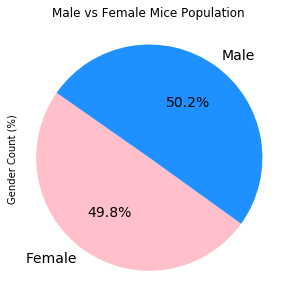

In [13]:

# Plot Pie Chart using Pandas
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', 
               y = "Gender Count", 
               ax=ax1, 
               autopct='%1.1f%%', 
               colors = ['pink', 'dodgerblue'],  
               startangle=145, shadow=False, 
               labels=gender_df['Sex'], 
               legend = False, fontsize=14)


# Adding Chart Elements
plt.title('Male vs Female Mice Population')
plt.ylabel('Gender Count (%)')
plt.axis("equal")
plt.savefig('Images/PiePandas.png')
plt.show()

### Matplotlib pyplot Pie Chart

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

### PYPLOT PIE CHART ###
# Reference: https://stackoverflow.com/questions/49199164/increasing-pie-chart-size-with-matplotlib-radius-parameter-appears-to-do-nothin

# Convert Columns into lists
gender_count = (mouse_metadata.groupby(["Sex"])["Mouse ID"].count()).tolist()
gender_count



[124, 125]

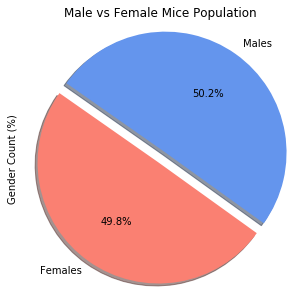

In [15]:
# Pie chart using Matplotlib
plt.figure(figsize=(5,5))
explode = (0.1, 0)

# Create the pie chart based on the gender_count above
plt.pie(gender_count, 
        explode=explode, 
        labels=['Females', 'Males'], 
        colors=['salmon', 'cornflowerblue'],
        autopct="%1.1f%%", shadow=True, startangle=145)

# Adding Chart Elements
plt.title('Male vs Female Mice Population')
plt.ylabel('Gender Count (%)')

plt.axis("equal")
plt.savefig('Images/PieMatPlotLib.png')
plt.show()

## Quartiles, outliers and boxplots


In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_study_combine.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = mouse_study_combine.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
sorted_df

# Select/Check final volume (maximmum tumor volume) of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
promising_drugs = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
filtered_data = mouse_study_combine[mouse_study_combine['Drug Regimen'].isin(promising_drugs)]
filtered_data = filtered_data.copy()
filtered_data
filtered_data.sort_values('Timepoint', inplace=True)

# Group by "Mouse ID"  and last tumor volume
groupedby_mouse = filtered_data.groupby('Mouse ID')

mouse_final_tumor_vol = groupedby_mouse['Tumor Volume (mm3)'].last()
mouse_final_tumor_vol_df = pd.DataFrame(mouse_final_tumor_vol)
mouse_final_tumor_vol_df.columns = ['Final Tumor Volume (mm3)']
combine_df = pd.merge(mouse_final_tumor_vol_df, mouse_metadata, on='Mouse ID')

#print(f"combine_df: \n {combine_df}")
capomulin_list = combine_df[combine_df['Drug Regimen'] == 'Capomulin']['Final Tumor Volume (mm3)']
ramicane_list = combine_df[combine_df['Drug Regimen'] == 'Ramicane']['Final Tumor Volume (mm3)']
infubinol_list = combine_df[combine_df['Drug Regimen'] == 'Infubinol']['Final Tumor Volume (mm3)']
ceftamin_list = combine_df[combine_df['Drug Regimen'] == 'Ceftamin']['Final Tumor Volume (mm3)']

boxplot_data = [capomulin_list, ramicane_list,infubinol_list,ceftamin_list]


index = 0 # setting drug name
# implemting for loop so that it loop though all four list 
# calculate & P/O the IQR and quantitatively determine if there are any potential outliers.

for data in boxplot_data:
    drug = promising_drugs[index]
    
    
    quartiles = data.quantile([.25,.5,.75]).round(3)  # rounding numerical val
    lowerq = quartiles[0.25].round(3)
    upperq = quartiles[0.75].round(3)
    iqr = round(upperq-lowerq, 3)  #rounding string
    
# Set index to 0 which is used to only print dividing line at top of output   
    if index == 0:
        print(f"----------------------------------------------------------------------")
    print(f"The lower quartile of tumor volume for {drug} is: {lowerq}")
    print(f"The upper quartile of tumor volume for {drug} is: {upperq}")
    print(f"The interquartile range of tumor volume for {drug} is: {iqr}")
    print(f"The the median of tumor volume for {drug} is: {quartiles[0.5]}")
  
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")
    print(f"----------------------------------------------------------------------")
    print ("")
    index += 1

# Check for outliers
#     for i in data:   
#         if i < lower_bound or i > upper_bound:
#             print(f" {i} ")
            

----------------------------------------------------------------------
The lower quartile of tumor volume for Capomulin is: 32.377
The upper quartile of tumor volume for Capomulin is: 40.159
The interquartile range of tumor volume for Capomulin is: 7.782
The the median of tumor volume for Capomulin is: 38.125
Values below 20.704 could be outliers for Capomulin.
Values above 51.832 could be outliers for Capomulin.
----------------------------------------------------------------------

The lower quartile of tumor volume for Ramicane is: 31.56
The upper quartile of tumor volume for Ramicane is: 40.659
The interquartile range of tumor volume for Ramicane is: 9.099
The the median of tumor volume for Ramicane is: 36.562
Values below 17.911 could be outliers for Ramicane.
Values above 54.308 could be outliers for Ramicane.
----------------------------------------------------------------------

The lower quartile of tumor volume for Infubinol is: 54.049
The upper quartile of tumor volume for I

### Boxplot

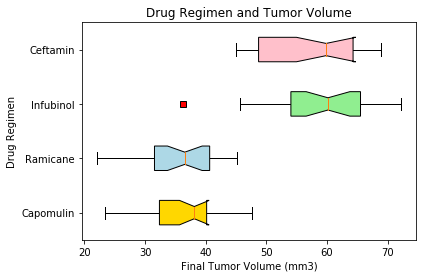

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
xlabels = promising_drugs

# Generate outlier plot of final total volume
fig1, ax1 = plt.subplots()
red_square = dict(markerfacecolor='r', marker='s')
bpplot = ax1.boxplot(boxplot_data, 
                     labels=xlabels, notch=True, 
                     patch_artist=True, 
                     vert=False, 
                     flierprops=red_square)

colors = ['gold', 'lightblue', 'lightgreen', 'pink']

for patch, color in zip(bpplot['boxes'], colors):
    patch.set_facecolor(color)
    
# Adding Chart Elements
ax1.set_title("Drug Regimen and Tumor Volume")
plt.xlabel("Final Tumor Volume (mm3)")
plt.ylabel("Drug Regimen")
plt.show()
plt.savefig('Images/BoxPlot.png')

## Line and scatter plots

### A line plot of effectiveness of Capomulin to reduce tumore volume over time

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin i.e. single mouse
capomulin_df = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
capomulin_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [22]:
# Select data of a single mouse
mouse_id = "x401"

capomulin_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]
capomulin_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,20,x401,Capomulin,Female,16,15,0,45.000000,0
11,21,x401,Capomulin,Female,16,15,5,45.473753,0
12,22,x401,Capomulin,Female,16,15,10,39.113891,0
13,23,x401,Capomulin,Female,16,15,15,39.776250,0
14,24,x401,Capomulin,Female,16,15,20,36.065835,0
15,25,x401,Capomulin,Female,16,15,25,36.617120,0
16,26,x401,Capomulin,Female,16,15,30,32.915292,0
17,27,x401,Capomulin,Female,16,15,35,30.206825,0
18,28,x401,Capomulin,Female,16,15,40,28.167397,0
19,29,x401,Capomulin,Female,16,15,45,28.484033,0


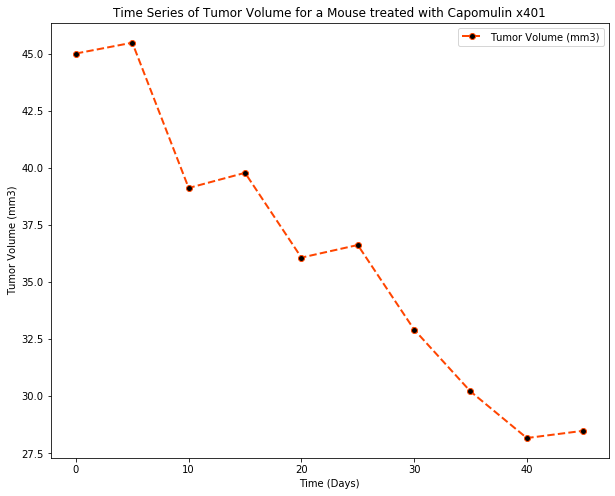

In [23]:
# Select only 2 columns of interest:
capomulin_single_df = capomulin_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_single_df
#capomulin_df.index
#Reset the index
capomulin_single_df = capomulin_single_df.reset_index(drop=True)
capomulin_single_df

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_single_df.set_index('Timepoint').plot(figsize=(10, 8), 
                                                linewidth=2.0, 
                                                color='orangered', 
                                                linestyle='--', 
                                                markevery=1, 
                                                marker='o', 
                                                markerfacecolor='black')


# Adding Chart Elements
plt.title(f"Time Series of Tumor Volume for a Mouse treated with Capomulin {mouse_id}")
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('Images/LineChart')
plt.show()


### A scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [24]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Display Capomulin dataframe
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
# Selecting only 3 columns of interest - new Data Frame
reduced_cap_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_cap_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [26]:
# Calulate average tumor volume for each mouse in the Capomulin regimen
average_capomulin = pd.DataFrame(reduced_cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

average_capomulin.head()

# Rename Tumor Volume column to Average Volume

# Set the 'Mouse ID' as index in the average_capomulin Data Frame
# average_capomulin = average_capomulin.set_index('Mouse ID')

average_capomulin = average_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)", "Weight (g)": "Mouse Weight (g)"})
average_capomulin.head()

,Mouse ID,Mouse Weight (g),Average Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


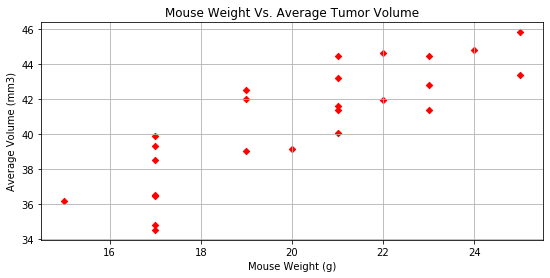

In [27]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen (Pandas)
average_capomulin.plot(
                       kind="scatter", 
                       x="Mouse Weight (g)", 
                       y="Average Volume (mm3)", 
                       grid=True, figsize=(9,4), 
                       title="Mouse Weight Vs. Average Tumor Volume", 
                       color="red", marker= 'D')


plt.savefig('Images/Scatterplot')
plt.show()

In [28]:
# Calculate the correlation coefficient 
# and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [29]:
# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = average_capomulin.iloc[:,1]
mouse_weight
avg_tumor_volume = average_capomulin.iloc[:,2]
avg_tumor_volume

correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
correlation
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


The r-vlaue is: 0.842
The r-squared is the coefficient of determination: 0.709
The equation of the regression line is: y = 0.95x + 21.55


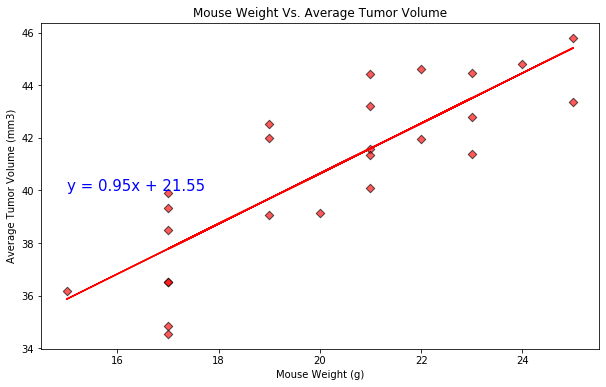

In [30]:
# Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
#Matplotlib
# Add the linear regression equation and line to plot
plt.figure(figsize =(10,6))
average_capomulin.head()
x_values = average_capomulin['Mouse Weight (g)']
y_values = average_capomulin['Average Volume (mm3)']

# Perform a linear regression on Mouse weight versus Average Tumor volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted violent crime rate
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, 
            marker= 'D', 
            facecolor='red', 
            edgecolors='black', 
            alpha=0.65)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(15, 40),fontsize=15,color="blue")

# Add Chart elements
plt.title("Mouse Weight Vs. Average Tumor Volume")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f"The r-vlaue is: {round(rvalue, 3)}")
print(f"The r-squared is the coefficient of determination: {round(rvalue**2, 3)}")
print(f"The equation of the regression line is: {line_eq}")

plt.savefig('Images/LinerRegressionModel')
plt.show()